# ASSIGNMENT-CASE STUDY ON REGRESSION


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset
data=pd.read_csv(r"C:\Users\HP\Downloads\ICT-DS\car_age_price.csv")

In [4]:
#first 4 rows
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [10]:
#to get no. of rows and columns
data.shape

(112, 2)

In [7]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
#checking for missing values
data.isnull().sum()

Year     0
Price    0
dtype: int64

NO MISSING VALUES.

In [11]:
#getting unique values of column Year
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [12]:
#getting value count of column Year
data['Year'].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

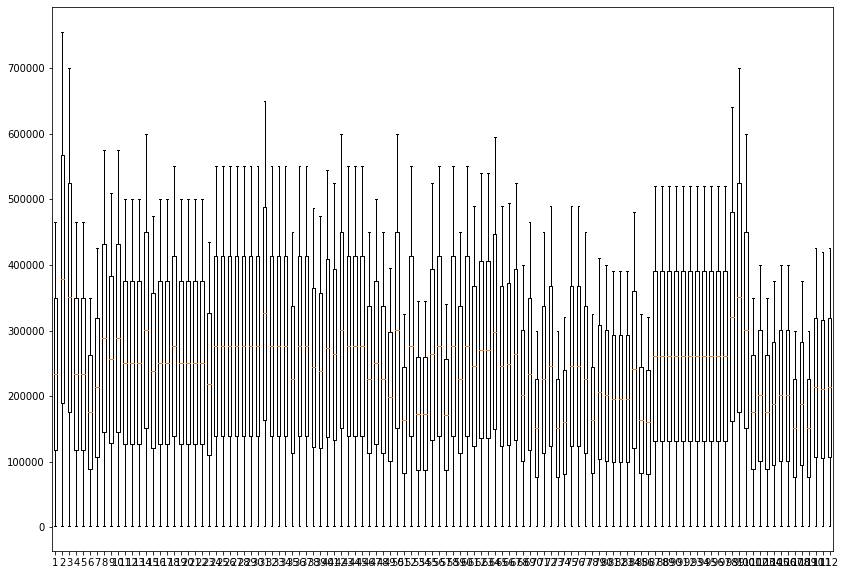

In [99]:
#boxplot for outlier detection
plt.figure(figsize = (14, 10))
plt.boxplot(data)
plt.show()

NO OUTLIER DETECTED.

In [27]:
#onehotencoding
odata=pd.get_dummies(data)
odata

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# CORRELATION 

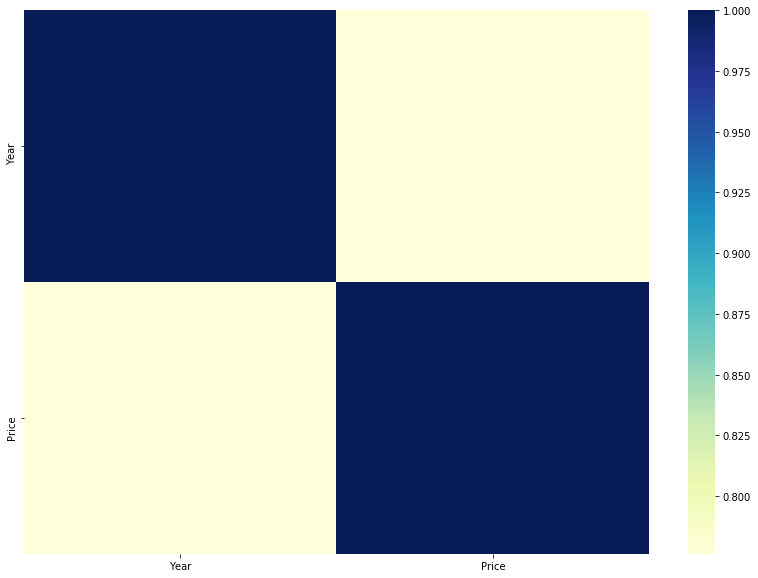

In [28]:
#correlation with heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(odata.corr(), annot = False,cmap='YlGnBu')


In [29]:
#assinging x and y(target) for building model
x=odata.drop('Price',axis=1)
y=odata['Price']

In [63]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=35,test_size=0.5)

In [64]:
y_test

14     475000
10     500000
49     600000
79     400000
82     390000
13     600000
24     550000
92     520000
95     520000
78     409999
90     520000
37     486000
27     550000
51     550000
110    420000
89     520000
38     475000
40     525000
85     320000
102    350000
0      465000
75     490000
60     490000
25     550000
100    350000
5      350000
65     495000
35     550000
31     550000
53     345000
106    300000
22     434999
7      575000
8      509999
111    425000
67     400000
50     325000
30     650000
41     600000
46     500000
48     396000
83     480000
26     550000
36     550000
68     465000
28     550000
43     550000
2      700000
23     550000
70     450000
20     500000
97     640000
12     500000
66     525000
17     550000
86     520000
Name: Price, dtype: int64

# Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
model=linear_regression.fit(x_train,y_train)
predictions=model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
mseLR=mean_squared_error(y_test,predictions).round(4)
r2LR=r2_score(y_test,predictions).round(2)
print('Mean Squared Error = ',mean_squared_error(y_test,predictions).round(4))
print('R Squared Value = ',r2_score(y_test,predictions).round(2))

Mean Squared Error =  2674234824.8032
R Squared Value =  0.64


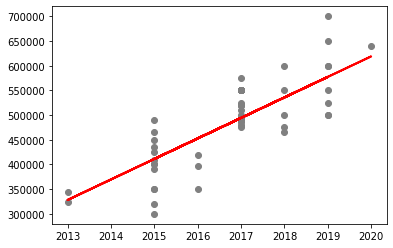

In [106]:
#plotting regression line
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, predictions, color='red', linewidth=2)
plt.show()

In [128]:
#defining slope,intercept and function to predict price of i10 in 2022
slope=model.coef_
intercept=model.intercept_
#printing slope and intercept value
print(slope,intercept)
def price(x):
  return slope * x + intercept

[41515.70680628] -83242941.7539267


In [127]:
#predicted price of second hand hyundai i10 in 2022
price(2022)

array([701817.40837696])

# LASSO

In [89]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scalex_train = scale.fit_transform(x_train)
scalex_test = scale.fit_transform(x_test)

In [90]:
lasso = Lasso(alpha = 1)
lasso.fit(scalex_train, y_train)
yhatlasso = lasso.predict(scalex_test)
mselasso=mean_squared_error(y_test,yhatlasso).round(4)
r2lasso=r2_score(y_test,yhatlasso).round(2)
print('Mean Squared Error = ',mean_squared_error(y_test,yhatlasso).round(4))
print('R Squared Value = ',r2_score(y_test,yhatlasso).round(2))

Mean Squared Error =  2812679552.9065
R Squared Value =  0.62


In [92]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(scalex_train, y_train)
yhatlassocv = lassocv.predict(scalex_test)
mselassocv=mean_squared_error(y_test,yhatlassocv).round(4)
r2lassocv=r2_score(y_test,yhatlassocv).round(2)
print('Mean Squared Error = ',mean_squared_error(y_test,yhatlassocv).round(4))
print('R Squared Value = ',r2_score(y_test,yhatlassocv).round(2))

Mean Squared Error =  2812478788.6166
R Squared Value =  0.62


# COMPARISON

In [129]:
compare = pd.DataFrame({'Model': ['LR', 'LASSO'], 'R2': [r2LR, r2lassocv], 'MSE': [mseLR, mselassocv]})
compare

,Model,R2,MSE
0,LR,0.64,2.674235e+09
1,LASSO,0.62,2.812479e+09


LINEAR REGRESSION IS BETTER THAN LASSO